In [1]:
%matplotlib inline
import os
import time
import itertools
import numpy as np
import pandas as pd
from scipy.special import comb
import matplotlib.lines as mlines
from sklearn.utils import shuffle
from scipy.stats import ortho_group
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

import tensorflow as tf
from xnn.xnn import xNN

In [2]:
# Simulation
corr = 0.5
noise_sigma = 1
dummy_num = 0
feature_num = 10
test_num = 10000
data_num = 10000

proj_matrix = np.zeros((feature_num,4))
proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])

def data_generator1(data_num, feature_num, corr, proj_matrix, noise_sigma):
    u = np.random.uniform(-1,1, [data_num, 1])
    t= np.sqrt(corr/(1-corr))
    X = np.zeros((data_num, feature_num))
    for i in range(feature_num):
        X[:, i:i+1] = (np.random.uniform(-1,1,[data_num,1])+t*u)/(1+t)
    Y = np.reshape(2*np.dot(X, proj_matrix[:,0])+0.2*np.exp(-4*np.dot(X, proj_matrix[:,1])) + \
              3*(np.dot(X, proj_matrix[:,2]))**2+2.5*np.sin(np.pi*np.dot(X, proj_matrix[:,3])), [-1,1]) + \
              noise_sigma*np.random.normal(0,1, [data_num,1])
    return X, Y

np.random.seed(0)
X, Y = data_generator1(data_num+test_num, feature_num+dummy_num, corr, proj_matrix, noise_sigma)
scaler_x = MinMaxScaler((-1, 1)); scaler_y = MinMaxScaler((-1, 1))
sX = scaler_x.fit_transform(X); sY = scaler_y.fit_transform(Y)
train_x, test_x, train_y, test_y = train_test_split(sX, sY, test_size = test_num)

Initial training.
Training epoch: 1, train loss: 0.06969, val loss: 0.06630
Training epoch: 2, train loss: 0.06052, val loss: 0.05732
Training epoch: 3, train loss: 0.05369, val loss: 0.05104
Training epoch: 4, train loss: 0.04928, val loss: 0.04727
Training epoch: 5, train loss: 0.04722, val loss: 0.04571
Training epoch: 6, train loss: 0.04564, val loss: 0.04451
Training epoch: 7, train loss: 0.04413, val loss: 0.04323
Training epoch: 8, train loss: 0.04285, val loss: 0.04221
Training epoch: 9, train loss: 0.04172, val loss: 0.04139
Training epoch: 10, train loss: 0.04079, val loss: 0.04072
Training epoch: 11, train loss: 0.03997, val loss: 0.04016
Training epoch: 12, train loss: 0.03927, val loss: 0.03973
Training epoch: 13, train loss: 0.03867, val loss: 0.03931
Training epoch: 14, train loss: 0.03815, val loss: 0.03900
Training epoch: 15, train loss: 0.03768, val loss: 0.03864
Training epoch: 16, train loss: 0.03727, val loss: 0.03835
Training epoch: 17, train loss: 0.03690, val lo

Training epoch: 140, train loss: 0.01552, val loss: 0.01601
Training epoch: 141, train loss: 0.01549, val loss: 0.01595
Training epoch: 142, train loss: 0.01552, val loss: 0.01599
Training epoch: 143, train loss: 0.01546, val loss: 0.01594
Training epoch: 144, train loss: 0.01545, val loss: 0.01592
Training epoch: 145, train loss: 0.01547, val loss: 0.01595
Training epoch: 146, train loss: 0.01546, val loss: 0.01592
Training epoch: 147, train loss: 0.01549, val loss: 0.01595
Training epoch: 148, train loss: 0.01546, val loss: 0.01593
Training epoch: 149, train loss: 0.01546, val loss: 0.01594
Training epoch: 150, train loss: 0.01545, val loss: 0.01589
Training epoch: 151, train loss: 0.01548, val loss: 0.01597
Training epoch: 152, train loss: 0.01544, val loss: 0.01588
Training epoch: 153, train loss: 0.01544, val loss: 0.01591
Training epoch: 154, train loss: 0.01543, val loss: 0.01590
Training epoch: 155, train loss: 0.01543, val loss: 0.01589
Training epoch: 156, train loss: 0.01542

Training epoch: 277, train loss: 0.01525, val loss: 0.01568
Training epoch: 278, train loss: 0.01519, val loss: 0.01559
Training epoch: 279, train loss: 0.01523, val loss: 0.01562
Training epoch: 280, train loss: 0.01520, val loss: 0.01561
Training epoch: 281, train loss: 0.01520, val loss: 0.01562
Training epoch: 282, train loss: 0.01525, val loss: 0.01569
Training epoch: 283, train loss: 0.01523, val loss: 0.01563
Training epoch: 284, train loss: 0.01522, val loss: 0.01560
Training epoch: 285, train loss: 0.01520, val loss: 0.01562
Training epoch: 286, train loss: 0.01525, val loss: 0.01568
Training epoch: 287, train loss: 0.01523, val loss: 0.01561
Training epoch: 288, train loss: 0.01524, val loss: 0.01569
Training epoch: 289, train loss: 0.01523, val loss: 0.01562
Training epoch: 290, train loss: 0.01520, val loss: 0.01559
Training epoch: 291, train loss: 0.01542, val loss: 0.01584
Training epoch: 292, train loss: 0.01533, val loss: 0.01571
Training epoch: 293, train loss: 0.01520

Training epoch: 415, train loss: 0.01513, val loss: 0.01551
Training epoch: 416, train loss: 0.01514, val loss: 0.01555
Training epoch: 417, train loss: 0.01531, val loss: 0.01573
Training epoch: 418, train loss: 0.01520, val loss: 0.01560
Training epoch: 419, train loss: 0.01520, val loss: 0.01561
Training epoch: 420, train loss: 0.01520, val loss: 0.01558
Training epoch: 421, train loss: 0.01514, val loss: 0.01555
Training epoch: 422, train loss: 0.01515, val loss: 0.01551
Training epoch: 423, train loss: 0.01513, val loss: 0.01554
Training epoch: 424, train loss: 0.01520, val loss: 0.01560
Training epoch: 425, train loss: 0.01513, val loss: 0.01554
Training epoch: 426, train loss: 0.01532, val loss: 0.01575
Training epoch: 427, train loss: 0.01531, val loss: 0.01574
Training epoch: 428, train loss: 0.01515, val loss: 0.01553
Training epoch: 429, train loss: 0.01514, val loss: 0.01555
Training epoch: 430, train loss: 0.01521, val loss: 0.01560
Training epoch: 431, train loss: 0.01514

Training epoch: 552, train loss: 0.01516, val loss: 0.01556
Training epoch: 553, train loss: 0.01511, val loss: 0.01550
Training epoch: 554, train loss: 0.01512, val loss: 0.01552
Training epoch: 555, train loss: 0.01520, val loss: 0.01564
Training epoch: 556, train loss: 0.01511, val loss: 0.01550
Training epoch: 557, train loss: 0.01510, val loss: 0.01551
Training epoch: 558, train loss: 0.01513, val loss: 0.01553
Training epoch: 559, train loss: 0.01523, val loss: 0.01565
Training epoch: 560, train loss: 0.01524, val loss: 0.01558
Training epoch: 561, train loss: 0.01514, val loss: 0.01557
Training epoch: 562, train loss: 0.01518, val loss: 0.01561
Training epoch: 563, train loss: 0.01510, val loss: 0.01549
Training epoch: 564, train loss: 0.01510, val loss: 0.01553
Training epoch: 565, train loss: 0.01519, val loss: 0.01561
Training epoch: 566, train loss: 0.01510, val loss: 0.01549
Training epoch: 567, train loss: 0.01516, val loss: 0.01554
Training epoch: 568, train loss: 0.01518

Training epoch: 689, train loss: 0.01508, val loss: 0.01547
Training epoch: 690, train loss: 0.01510, val loss: 0.01549
Training epoch: 691, train loss: 0.01511, val loss: 0.01556
Training epoch: 692, train loss: 0.01510, val loss: 0.01553
Training epoch: 693, train loss: 0.01508, val loss: 0.01547
Training epoch: 694, train loss: 0.01508, val loss: 0.01549
Training epoch: 695, train loss: 0.01507, val loss: 0.01547
Training epoch: 696, train loss: 0.01509, val loss: 0.01549
Training epoch: 697, train loss: 0.01516, val loss: 0.01557
Training epoch: 698, train loss: 0.01523, val loss: 0.01564
Training epoch: 699, train loss: 0.01507, val loss: 0.01549
Training epoch: 700, train loss: 0.01522, val loss: 0.01564
Training epoch: 701, train loss: 0.01533, val loss: 0.01566
Training epoch: 702, train loss: 0.01512, val loss: 0.01553
Training epoch: 703, train loss: 0.01523, val loss: 0.01568
Training epoch: 704, train loss: 0.01507, val loss: 0.01549
Training epoch: 705, train loss: 0.01512

Training epoch: 827, train loss: 0.01507, val loss: 0.01547
Training epoch: 828, train loss: 0.01510, val loss: 0.01556
Training epoch: 829, train loss: 0.01510, val loss: 0.01550
Training epoch: 830, train loss: 0.01513, val loss: 0.01551
Training epoch: 831, train loss: 0.01507, val loss: 0.01551
Training epoch: 832, train loss: 0.01506, val loss: 0.01545
Training epoch: 833, train loss: 0.01504, val loss: 0.01543
Training epoch: 834, train loss: 0.01507, val loss: 0.01550
Training epoch: 835, train loss: 0.01511, val loss: 0.01550
Training epoch: 836, train loss: 0.01515, val loss: 0.01551
Training epoch: 837, train loss: 0.01508, val loss: 0.01550
Training epoch: 838, train loss: 0.01512, val loss: 0.01556
Training epoch: 839, train loss: 0.01517, val loss: 0.01559
Training epoch: 840, train loss: 0.01517, val loss: 0.01558
Training epoch: 841, train loss: 0.01504, val loss: 0.01549
Training epoch: 842, train loss: 0.01504, val loss: 0.01546
Training epoch: 843, train loss: 0.01503

Training epoch: 964, train loss: 0.01504, val loss: 0.01544
Training epoch: 965, train loss: 0.01506, val loss: 0.01545
Training epoch: 966, train loss: 0.01504, val loss: 0.01543
Training epoch: 967, train loss: 0.01504, val loss: 0.01549
Training epoch: 968, train loss: 0.01509, val loss: 0.01552
Training epoch: 969, train loss: 0.01501, val loss: 0.01540
Training epoch: 970, train loss: 0.01504, val loss: 0.01548
Training epoch: 971, train loss: 0.01508, val loss: 0.01553
Training epoch: 972, train loss: 0.01508, val loss: 0.01546
Training epoch: 973, train loss: 0.01507, val loss: 0.01550
Training epoch: 974, train loss: 0.01506, val loss: 0.01545
Training epoch: 975, train loss: 0.01503, val loss: 0.01541
Training epoch: 976, train loss: 0.01511, val loss: 0.01550
Training epoch: 977, train loss: 0.01513, val loss: 0.01551
Training epoch: 978, train loss: 0.01511, val loss: 0.01550
Training epoch: 979, train loss: 0.01503, val loss: 0.01545
Training epoch: 980, train loss: 0.01504

Training epoch: 1100, train loss: 0.01510, val loss: 0.01555
Training epoch: 1101, train loss: 0.01504, val loss: 0.01549
Training epoch: 1102, train loss: 0.01506, val loss: 0.01547
Training epoch: 1103, train loss: 0.01501, val loss: 0.01541
Training epoch: 1104, train loss: 0.01500, val loss: 0.01540
Training epoch: 1105, train loss: 0.01502, val loss: 0.01546
Training epoch: 1106, train loss: 0.01523, val loss: 0.01561
Training epoch: 1107, train loss: 0.01504, val loss: 0.01546
Training epoch: 1108, train loss: 0.01514, val loss: 0.01551
Training epoch: 1109, train loss: 0.01501, val loss: 0.01544
Training epoch: 1110, train loss: 0.01516, val loss: 0.01549
Training epoch: 1111, train loss: 0.01500, val loss: 0.01540
Training epoch: 1112, train loss: 0.01501, val loss: 0.01543
Training epoch: 1113, train loss: 0.01508, val loss: 0.01552
Training epoch: 1114, train loss: 0.01502, val loss: 0.01542
Training epoch: 1115, train loss: 0.01507, val loss: 0.01548
Training epoch: 1116, tr

Training epoch: 1236, train loss: 0.01505, val loss: 0.01550
Training epoch: 1237, train loss: 0.01502, val loss: 0.01544
Training epoch: 1238, train loss: 0.01511, val loss: 0.01551
Training epoch: 1239, train loss: 0.01511, val loss: 0.01550
Training epoch: 1240, train loss: 0.01503, val loss: 0.01548
Training epoch: 1241, train loss: 0.01507, val loss: 0.01552
Training epoch: 1242, train loss: 0.01506, val loss: 0.01550
Training epoch: 1243, train loss: 0.01501, val loss: 0.01543
Training epoch: 1244, train loss: 0.01500, val loss: 0.01543
Training epoch: 1245, train loss: 0.01503, val loss: 0.01544
Training epoch: 1246, train loss: 0.01518, val loss: 0.01561
Training epoch: 1247, train loss: 0.01505, val loss: 0.01551
Training epoch: 1248, train loss: 0.01523, val loss: 0.01562
Training epoch: 1249, train loss: 0.01504, val loss: 0.01544
Training epoch: 1250, train loss: 0.01503, val loss: 0.01544
Training epoch: 1251, train loss: 0.01500, val loss: 0.01542
Training epoch: 1252, tr

Training epoch: 1371, train loss: 0.01510, val loss: 0.01552
Training epoch: 1372, train loss: 0.01501, val loss: 0.01544
Training epoch: 1373, train loss: 0.01500, val loss: 0.01543
Training epoch: 1374, train loss: 0.01500, val loss: 0.01545
Training epoch: 1375, train loss: 0.01502, val loss: 0.01541
Training epoch: 1376, train loss: 0.01499, val loss: 0.01543
Training epoch: 1377, train loss: 0.01512, val loss: 0.01557
Training epoch: 1378, train loss: 0.01508, val loss: 0.01551
Training epoch: 1379, train loss: 0.01518, val loss: 0.01569
Training epoch: 1380, train loss: 0.01502, val loss: 0.01548
Training epoch: 1381, train loss: 0.01509, val loss: 0.01544
Training epoch: 1382, train loss: 0.01518, val loss: 0.01554
Training epoch: 1383, train loss: 0.01503, val loss: 0.01546
Training epoch: 1384, train loss: 0.01519, val loss: 0.01563
Training epoch: 1385, train loss: 0.01500, val loss: 0.01543
Training epoch: 1386, train loss: 0.01512, val loss: 0.01557
Training epoch: 1387, tr

Training epoch: 1507, train loss: 0.01502, val loss: 0.01540
Training epoch: 1508, train loss: 0.01511, val loss: 0.01552
Training epoch: 1509, train loss: 0.01499, val loss: 0.01543
Training epoch: 1510, train loss: 0.01501, val loss: 0.01540
Training epoch: 1511, train loss: 0.01502, val loss: 0.01543
Training epoch: 1512, train loss: 0.01499, val loss: 0.01541
Training epoch: 1513, train loss: 0.01501, val loss: 0.01546
Training epoch: 1514, train loss: 0.01499, val loss: 0.01542
Training epoch: 1515, train loss: 0.01506, val loss: 0.01544
Training epoch: 1516, train loss: 0.01507, val loss: 0.01546
Training epoch: 1517, train loss: 0.01505, val loss: 0.01552
Training epoch: 1518, train loss: 0.01502, val loss: 0.01546
Training epoch: 1519, train loss: 0.01507, val loss: 0.01546
Training epoch: 1520, train loss: 0.01507, val loss: 0.01551
Training epoch: 1521, train loss: 0.01500, val loss: 0.01545
Training epoch: 1522, train loss: 0.01514, val loss: 0.01556
Training epoch: 1523, tr

Training epoch: 1643, train loss: 0.01504, val loss: 0.01545
Training epoch: 1644, train loss: 0.01504, val loss: 0.01542
Training epoch: 1645, train loss: 0.01498, val loss: 0.01543
Training epoch: 1646, train loss: 0.01506, val loss: 0.01551
Training epoch: 1647, train loss: 0.01502, val loss: 0.01545
Training epoch: 1648, train loss: 0.01501, val loss: 0.01545
Training epoch: 1649, train loss: 0.01523, val loss: 0.01564
Training epoch: 1650, train loss: 0.01501, val loss: 0.01541
Training epoch: 1651, train loss: 0.01507, val loss: 0.01546
Training epoch: 1652, train loss: 0.01509, val loss: 0.01555
Training epoch: 1653, train loss: 0.01499, val loss: 0.01542
Training epoch: 1654, train loss: 0.01516, val loss: 0.01561
Training epoch: 1655, train loss: 0.01504, val loss: 0.01548
Training epoch: 1656, train loss: 0.01509, val loss: 0.01548
Training epoch: 1657, train loss: 0.01507, val loss: 0.01545
Training epoch: 1658, train loss: 0.01500, val loss: 0.01543
Training epoch: 1659, tr

Training epoch: 1778, train loss: 0.01506, val loss: 0.01554
Training epoch: 1779, train loss: 0.01511, val loss: 0.01557
Training epoch: 1780, train loss: 0.01520, val loss: 0.01570
Training epoch: 1781, train loss: 0.01499, val loss: 0.01543
Training epoch: 1782, train loss: 0.01510, val loss: 0.01549
Training epoch: 1783, train loss: 0.01525, val loss: 0.01562
Training epoch: 1784, train loss: 0.01502, val loss: 0.01543
Training epoch: 1785, train loss: 0.01502, val loss: 0.01546
Training epoch: 1786, train loss: 0.01503, val loss: 0.01546
Training epoch: 1787, train loss: 0.01499, val loss: 0.01543
Training epoch: 1788, train loss: 0.01508, val loss: 0.01550
Training epoch: 1789, train loss: 0.01512, val loss: 0.01549
Training epoch: 1790, train loss: 0.01535, val loss: 0.01570
Training epoch: 1791, train loss: 0.01518, val loss: 0.01560
Training epoch: 1792, train loss: 0.01500, val loss: 0.01541
Training epoch: 1793, train loss: 0.01512, val loss: 0.01556
Training epoch: 1794, tr

Training epoch: 1913, train loss: 0.01498, val loss: 0.01540
Training epoch: 1914, train loss: 0.01514, val loss: 0.01557
Training epoch: 1915, train loss: 0.01498, val loss: 0.01539
Training epoch: 1916, train loss: 0.01514, val loss: 0.01562
Training epoch: 1917, train loss: 0.01500, val loss: 0.01543
Training epoch: 1918, train loss: 0.01501, val loss: 0.01541
Training epoch: 1919, train loss: 0.01512, val loss: 0.01551
Training epoch: 1920, train loss: 0.01509, val loss: 0.01548
Training epoch: 1921, train loss: 0.01511, val loss: 0.01547
Training epoch: 1922, train loss: 0.01499, val loss: 0.01540
Training epoch: 1923, train loss: 0.01501, val loss: 0.01549
Training epoch: 1924, train loss: 0.01501, val loss: 0.01547
Training epoch: 1925, train loss: 0.01501, val loss: 0.01543
Training epoch: 1926, train loss: 0.01500, val loss: 0.01544
Training epoch: 1927, train loss: 0.01500, val loss: 0.01542
Training epoch: 1928, train loss: 0.01502, val loss: 0.01545
Training epoch: 1929, tr

Training epoch: 2048, train loss: 0.01501, val loss: 0.01550
Training epoch: 2049, train loss: 0.01500, val loss: 0.01544
Training epoch: 2050, train loss: 0.01501, val loss: 0.01542
Training epoch: 2051, train loss: 0.01511, val loss: 0.01551
Training epoch: 2052, train loss: 0.01505, val loss: 0.01545
Training epoch: 2053, train loss: 0.01505, val loss: 0.01545
Training epoch: 2054, train loss: 0.01500, val loss: 0.01541
Training epoch: 2055, train loss: 0.01507, val loss: 0.01548
Training epoch: 2056, train loss: 0.01502, val loss: 0.01544
Training epoch: 2057, train loss: 0.01498, val loss: 0.01540
Training epoch: 2058, train loss: 0.01497, val loss: 0.01540
Training epoch: 2059, train loss: 0.01504, val loss: 0.01543
Training epoch: 2060, train loss: 0.01512, val loss: 0.01552
Training epoch: 2061, train loss: 0.01509, val loss: 0.01549
Training epoch: 2062, train loss: 0.01503, val loss: 0.01544
Training epoch: 2063, train loss: 0.01512, val loss: 0.01553
Training epoch: 2064, tr

Tuning epoch: 78, train loss: 0.01496, val loss: 0.01540
Tuning epoch: 79, train loss: 0.01495, val loss: 0.01537
Tuning epoch: 80, train loss: 0.01495, val loss: 0.01540
Tuning epoch: 81, train loss: 0.01498, val loss: 0.01540
Tuning epoch: 82, train loss: 0.01495, val loss: 0.01538
Tuning epoch: 83, train loss: 0.01498, val loss: 0.01540
Tuning epoch: 84, train loss: 0.01495, val loss: 0.01538
Tuning epoch: 85, train loss: 0.01496, val loss: 0.01539
Tuning epoch: 86, train loss: 0.01496, val loss: 0.01538
Tuning epoch: 87, train loss: 0.01495, val loss: 0.01538
Tuning epoch: 88, train loss: 0.01496, val loss: 0.01541
Tuning epoch: 89, train loss: 0.01496, val loss: 0.01537
Tuning epoch: 90, train loss: 0.01497, val loss: 0.01543
Tuning epoch: 91, train loss: 0.01495, val loss: 0.01537
Tuning epoch: 92, train loss: 0.01497, val loss: 0.01540
Tuning epoch: 93, train loss: 0.01494, val loss: 0.01537
Tuning epoch: 94, train loss: 0.01495, val loss: 0.01538
Tuning epoch: 95, train loss: 0

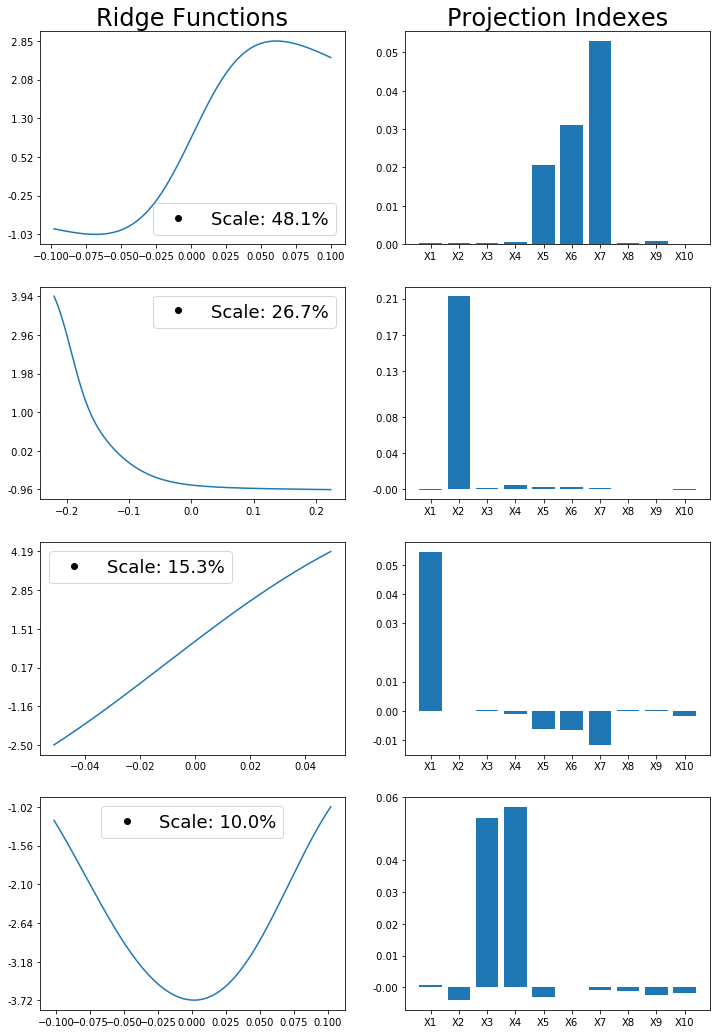

In [11]:
tf.random.set_seed(0)
model = xNN(input_num = 10, input_dummy_num=0, subnet_num=10, subnet_arch=[10, 6], task="Regression",
               activation_func=tf.tanh, batch_size=1000, training_epochs=5000, lr_bp=0.001, 
               beta_threshold=0.01, tuning_epochs=200, l1_proj=0.001, l1_subnet=0.001, 
               verbose=True, val_ratio=0.2, early_stop_thres=500)
model.fit(train_x, train_y)
model.visualize("./", "test")

In [12]:
tr_pred = model.predict(model.tr_x) 
val_pred = model.predict(model.val_x) 
pred_test = model.predict(test_x)

sosxnn_mse_stat = np.hstack([np.round(np.mean((scaler_y.inverse_transform(tr_pred) - scaler_y.inverse_transform(model.tr_y))**2),5),\
                             np.round(np.mean((scaler_y.inverse_transform(val_pred) - scaler_y.inverse_transform(model.val_y))**2),5),\
               np.round(np.mean((scaler_y.inverse_transform(pred_test) - scaler_y.inverse_transform(test_y))**2),5)])
print(sosxnn_mse_stat)

[0.99012 1.01791 1.01834]
